# 作業：使用 Flask 撰寫一個 Web Server

# [作業目標]
* 分別實作接受 Get 和 Post 方法的 api。
* 使用 Post 完成檔案上傳功能，並提供簡易的上傳畫面。

## [作業重點]

* 能充分理解 Get / Post 差異。
* 使用 Postman 發送 Request，確定功能是否正確。

# 作業1
* 實作只接受 Get 發送的 Request，帶入參數 name，將其值回傳。

In [2]:
# 引用需要的套件, 若有多個套件要引用，可使用逗號隔開
from flask import Flask, request

app = Flask(__name__)

# 設定網址路由，及接受的 method(預設是 GET)
@app.route('/', methods=['GET'])
def index():
    name = request.args.get('name') # 取得 name 參數
    return "Hello " + name + " wellcom"
    

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jul/2021 22:12:42] "GET /?name=Nick HTTP/1.1" 200 -


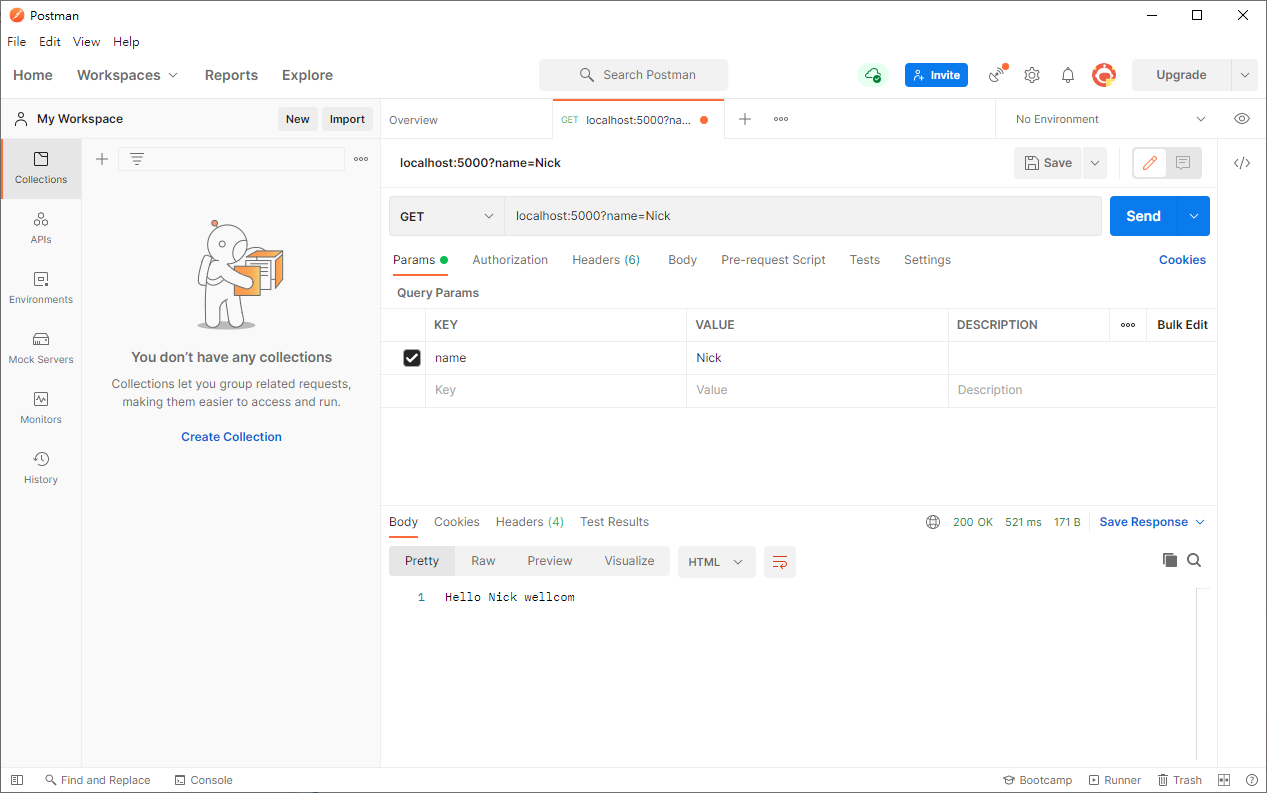

# 作業2
* 實作只接受 Post 發送的 Request，帶入參數 name，將其值回傳。

In [4]:
# 引用需要的套件, 若有多個套件要引用，可使用逗號隔開
from flask import Flask, request

app = Flask(__name__)

# 設定網址路由，及接受的 method(預設是 GET)
@app.route('/', methods=['POST'])
def index():
    name = request.form.get('name') # 取得 name 參數
   
    return "Hello " + name + " welcom"
    

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jul/2021 22:14:42] "POST / HTTP/1.1" 200 -


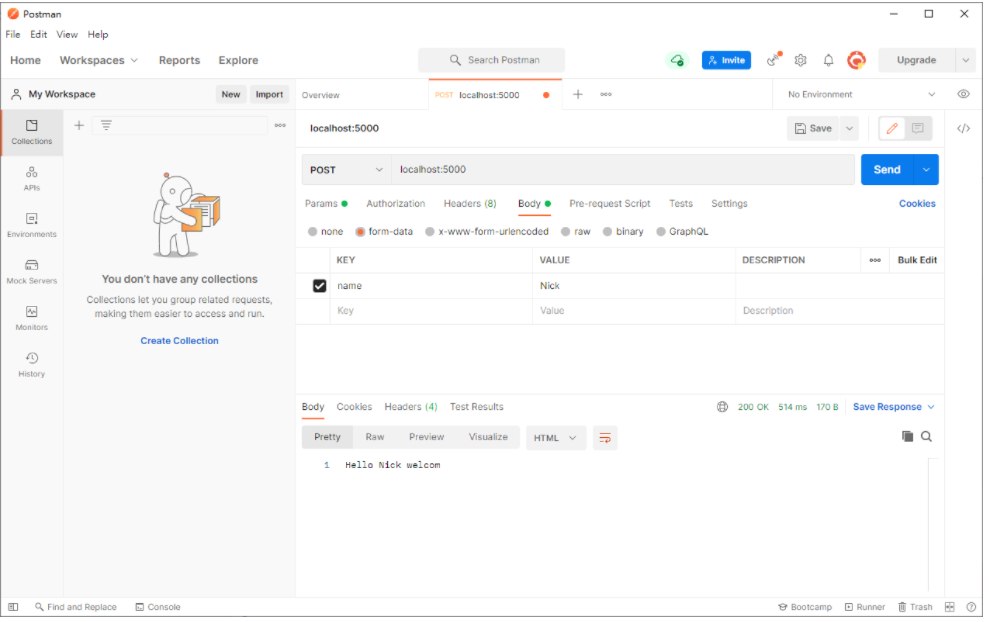

# 作業3
* 使用 Post 實作檔案上傳功能，並有一個簡單的畫面可以操作檔案上傳的動作。

In [9]:
from flask import Flask, render_template,request

app = Flask(__name__)

# 設定網址路由，及接受的 method
  
@app.route('/')
def main():
    return render_template('index.html')
    
@app.route('/upload', methods=['POST'])
def index():
    file = request.files['file'] # 取得 request 中的 file(記得發送 postman 中的 檔案參數名稱要和這邊一致)
    file.save(file.filename)  # 把檔案存起來，並用原來的檔名作為名稱
    return file.filename
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jul/2021 22:30:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2021 22:30:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Jul/2021 22:30:46] "POST /upload HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2021 22:31:51] "POST /upload HTTP/1.1" 200 -


```
<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width, initial-scale=1.0">
	<title>Day017_使用 Python 開發 Flask 網頁程式</title>
</head>
<body>
	<form action = "/upload" method = "POST" enctype = "multipart/form-data">
        <input type = "file" name = "file" />
        <input type = "submit" value="提交"/>
    </form>
</body>
</html>
```

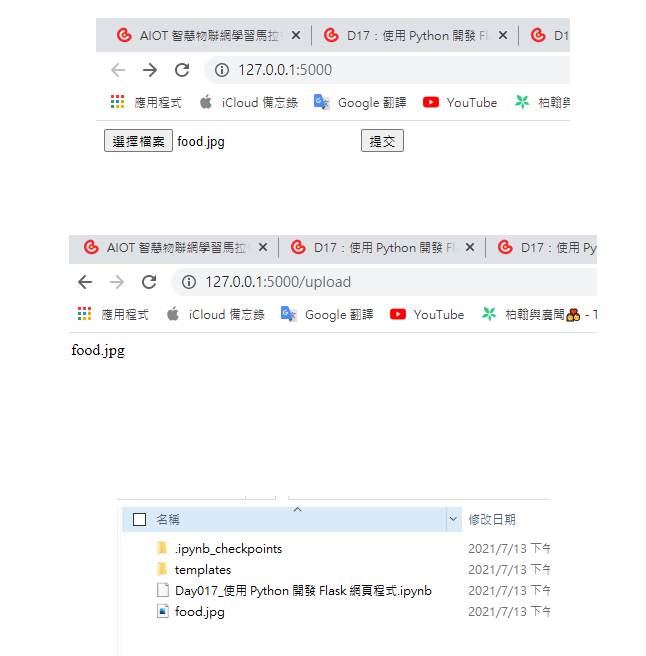